# Task 2: Titanic Classification:

Make a system which tells whether the person will be save from sinking. What factors were
most likely lead to success-socio-economic factors like status, age, gender and more.

In [1]:
# importing necessary libaries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Loading the dataset

In [2]:
dataset = pd.read_csv('Titanic-Dataset.csv')


In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Titanic survival dataset typically contains information about passengers who were aboard the   Titanic, including whether they survived or not. Here's a brief explanation of each feature in the dataset:

    'PassengerId': This is a unique identifier for each passenger and is used to distinguish one     
                   passenger from another.

    'Survived': This binary feature indicates whether a passenger survived or not. It has two possible                 values:        0: The passenger did not survive.
                               1: The passenger survived.

    'Pclass': This feature represents the passenger class, which is a proxy for socio-economic status.     It has three possible values:  1: First class   2: Second class   3: Third class

    'Name': The name of the passenger, including their title and surname.

    'Sex': The gender of the passenger, which can be 'male' or 'female'.

    'Age': The age of the passenger, represented as a numerical value.

    'SibSp': This feature represents the number of siblings or spouses (i.e., family members) aboard        the Titanic with the passenger.

    'Parch': The number of parents or children aboard the Titanic with the passenger.

    'Ticket': The ticket number issued to the passenger.

    'Fare': The fare paid by the passenger for the ticket.

    'Cabin': The cabin number where the passenger stayed. This feature may have missing values.

    'Embarked': The port of embarkation for the passenger. It has three possible values:                               'C': Cherbourg  'Q': Queenstown  'S': Southampton
    
     Here Survived is our Target variable.

### EDA 

In [4]:
dataset.shape

(891, 12)

In [5]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# dropping this featurse as they have little to no significance on target var

col_to_drop = ['PassengerId','Cabin', 'Ticket','Name']
dataset.drop(col_to_drop, axis=1, inplace = True)



In [9]:
# this gives us a descriptive statistics of the numerical features

dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
dataset.nunique().to_frame("No of unique values ")

,No of unique values
Survived,2
Pclass,3
Sex,2
Age,88
SibSp,7
Parch,7
Fare,248
Embarked,3


C:\Users\Priyangshu\AppData\Local\Temp\ipykernel_6452\966569924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True,cmap='coolwarm')


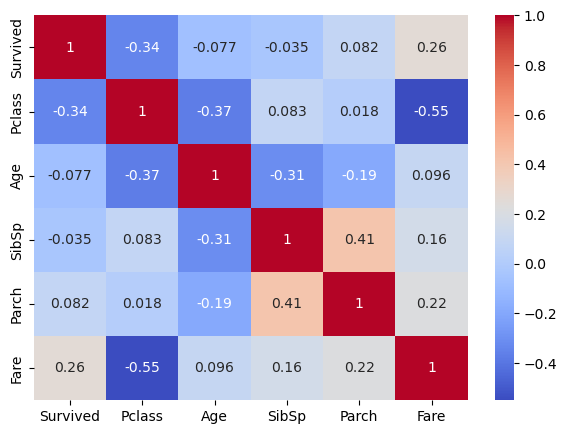

In [12]:

plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True,cmap='coolwarm')
plt.show()

In [13]:
# changing datatype of Fare from float to int
dataset['Fare'] = dataset['Fare'].astype(int)

<Figure size 800x600 with 0 Axes>

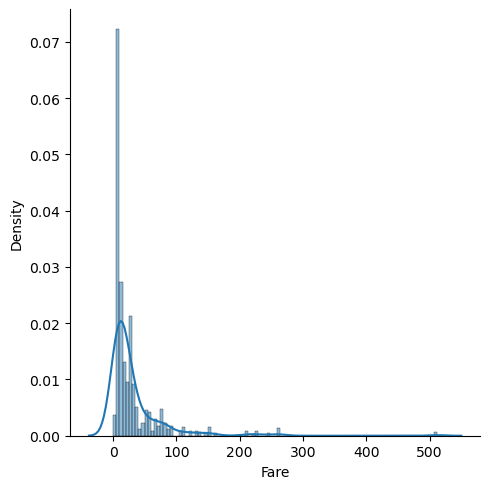

In [14]:
plt.figure(figsize=(8, 6))     #(width,height)

sns.displot(dataset['Fare'],kde=True, stat='density', kde_kws=dict(cut=3))

#### Gender

<Axes: xlabel='Sex', ylabel='Survived'>

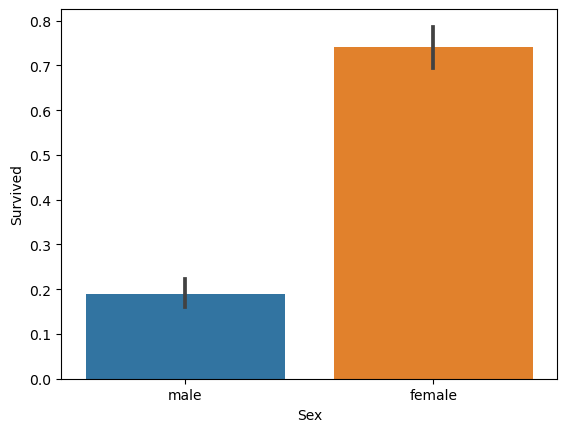

In [15]:
sns.barplot(x='Sex', y='Survived',data= dataset)

#### Passenger class

In [16]:

result = dataset.groupby('Pclass')['Survived'].mean().reset_index()

result['Survived_percentage'] = (result['Survived'] / result['Survived'].sum())*100

result.round(3)


,Pclass,Survived,Survived_percentage
0,1,0.630,46.819
1,2,0.473,35.159
2,3,0.242,18.022


<Figure size 800x400 with 0 Axes>

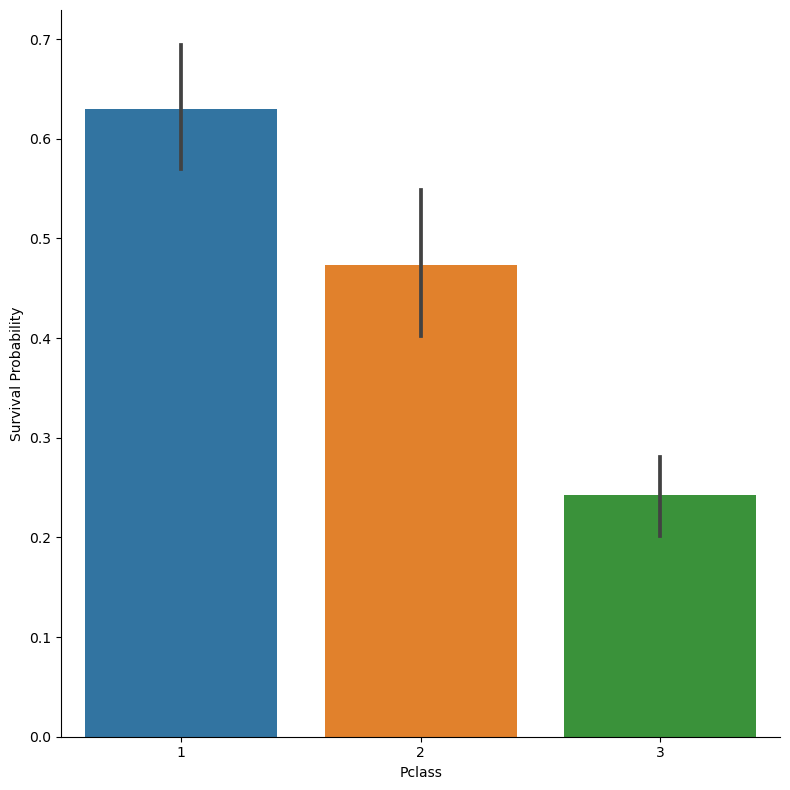

In [17]:
plt.figure(figsize=(8, 4))
pclass = sns.catplot(x="Pclass", y="Survived", data=dataset, kind="bar", height=8)
pclass.set_ylabels("Survival Probability")

The first class passengers have the more chance of surviving than 2nd and 3rd class



#### Pclass vs Survived by Sex

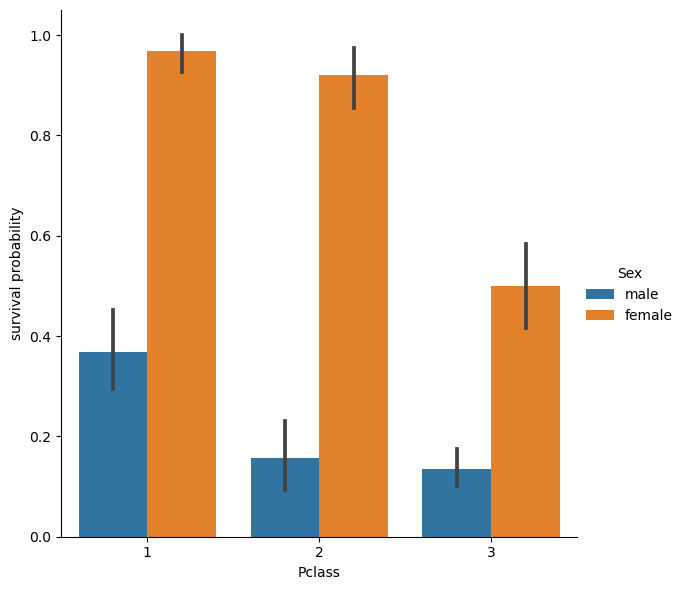

In [18]:

g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=dataset, height=6, kind="bar")
g = g.set_ylabels("survival probability")

import warnings
warnings.filterwarnings("ignore")

#### Imputing the missing values in age column with the median 

In [19]:

median_age = dataset['Age'].median()

# Fill missing values in the 'Age' column with the median age
dataset['Age'].fillna(median_age, inplace=True)

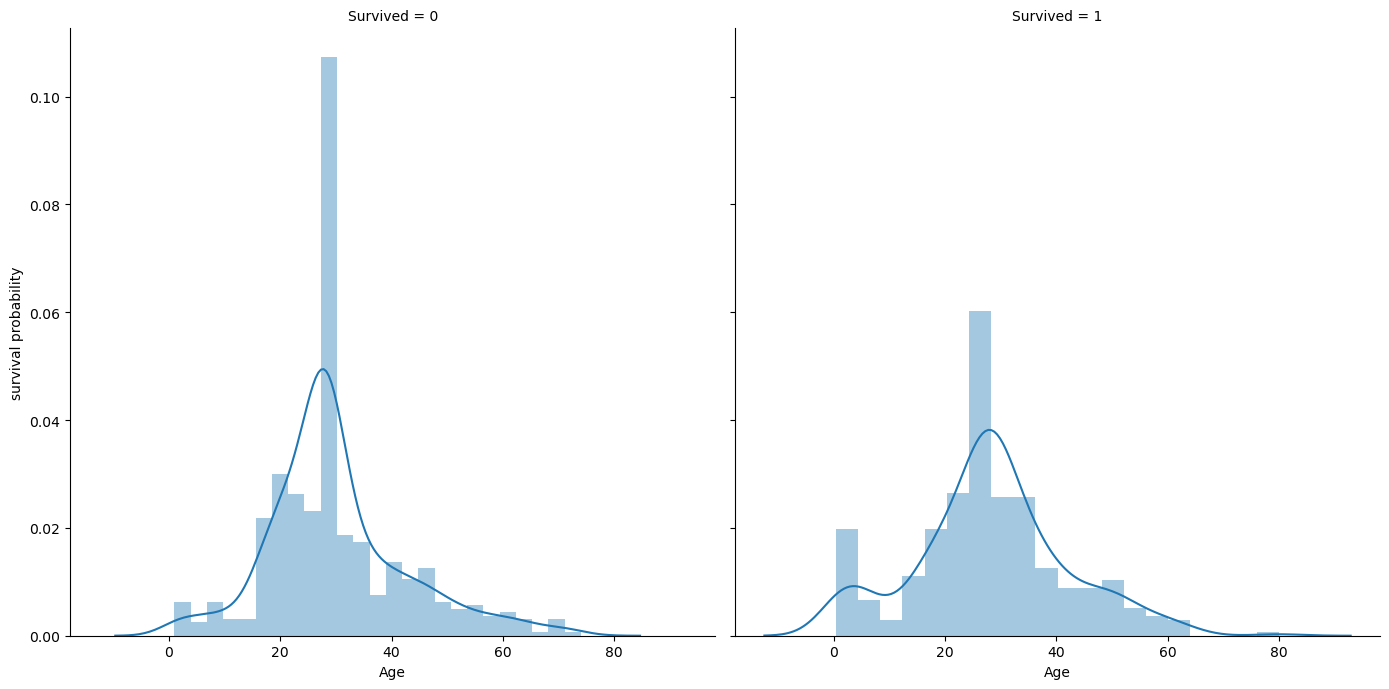

In [20]:
age_dist= sns.FacetGrid(dataset, col = 'Survived', height=7)
age_dist = age_dist.map(sns.distplot, "Age")
age_dist = age_dist.set_ylabels("survival probability")

#### From this distribution we can conclude that  children in the age group of 0- 10 years and people in the age group of 20-40 years has relatively higher chance of surviving

### Feature Engineering 

In [21]:
# unique values of no of sibling + spouses present in the ship
dataset['SibSp'].unique() 


array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [22]:
# unique values of no of parents + children present in the ship
dataset['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [23]:
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

result= dataset.groupby('FamilySize')['Survived'].mean().reset_index().sort_values(
    by='Survived', ascending=False)


result['Survived_percentage'] = (result['Survived'] / result['Survived'].sum())*100

result.round(3)


,FamilySize,Survived,Survived_percentage
3,4,0.724,25.601
2,3,0.578,20.449
1,2,0.553,19.543
6,7,0.333,11.784
0,1,0.304,10.731
4,5,0.200,7.071
5,6,0.136,4.821
7,8,0.000,0.000
8,11,0.000,0.000


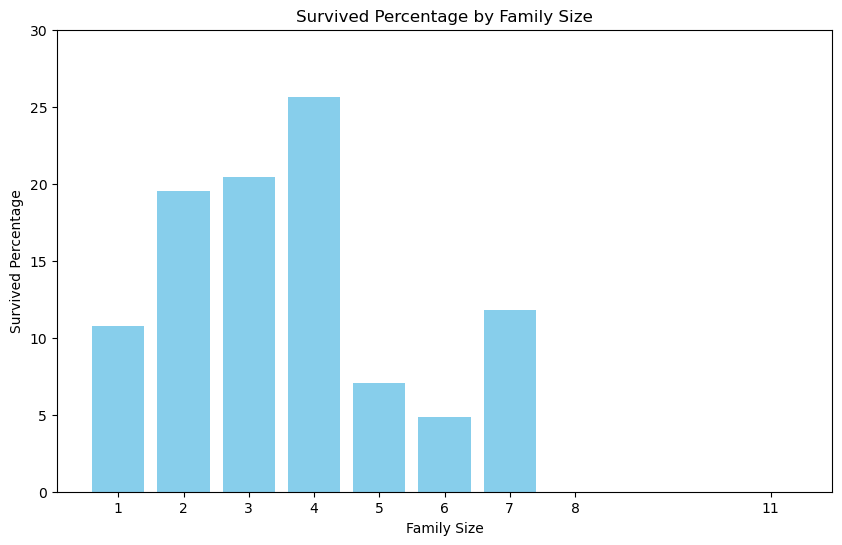

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(result['FamilySize'], result['Survived_percentage'], color='skyblue')
plt.xlabel('Family Size')
plt.ylabel('Survived Percentage')
plt.title('Survived Percentage by Family Size')
plt.xticks(result['FamilySize'])

# Adjust the y-axis limit if necessary
plt.ylim(0, 30)  
plt.show()

#### The passengers having family size of 4 and 3 have the maximum chance of surviving 

In [25]:
col_to_drop = ['Parch','SibSp']

dataset.drop(col_to_drop, axis=1, inplace = True)

#### Embarked 

In [26]:
dataset["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
#Fill Embarked with 'S' i.e. the most frequent values
dataset["Embarked"] = dataset["Embarked"].fillna("S")

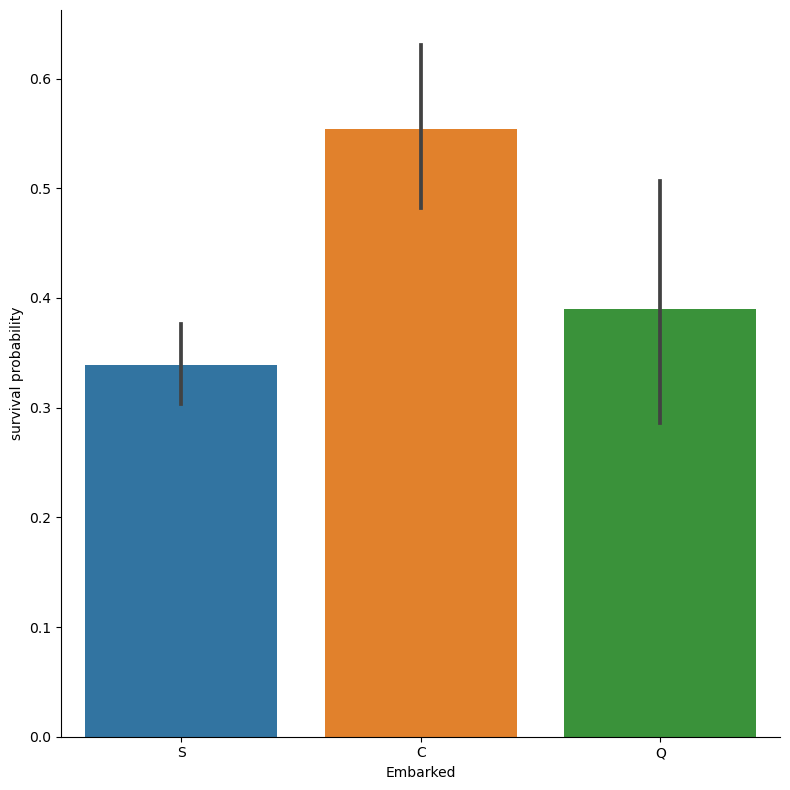

In [28]:
res = sns.catplot(x="Embarked", y="Survived", data=dataset, height=8, kind="bar")
res= res.set_ylabels("survival probability")

#### Passenger coming from Cherbourg (C) have more chance to survive

### Encoding the categorical variable

In [30]:
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:\n", categorical_columns)

Categorical Columns:
 ['Sex', 'Embarked']


In [31]:
# encoding the categorical features in our dataset

ports = {"S": 0, "C": 1, "Q": 2}

dataset['Embarked'] = dataset['Embarked'].map(ports)

genders = {"male": 0, "female": 1}

dataset['Sex'] = dataset['Sex'].map(genders)



### Splitting dataset into training and testing

In [32]:
# input and output data

x = dataset.drop(dataset.columns[[0]], axis = 1)
y = dataset['Survived']

In [33]:
x.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,22.0,7,0,2
1,1,1,38.0,71,1,2
2,3,1,26.0,7,0,1
3,1,1,35.0,53,0,2
4,3,0,35.0,8,0,1


In [34]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =42)

### Feature Scaling 

In [36]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

### Fitting ML models 

In [37]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
logreg_ypred = logreg.predict(xtest)


# Support Vector Machine classifier
svc_classifier = SVC()
svc_classifier.fit(xtrain, ytrain)
svc_classifier_ypred = svc_classifier.predict(xtest)


# Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(xtrain, ytrain)
dt_classifier_ypred = dt_classifier.predict(xtest)


# KNN classifier
knn_classifier = KNeighborsClassifier(5)
knn_classifier.fit(xtrain, ytrain)
knn_classifier_ypred = knn_classifier.predict(xtest)


# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 42 )
rf_classifier.fit(xtrain, ytrain)
rf_classifier_ypred = rf_classifier.predict(xtest)


# Gaussian Naive Bayes 
gaussian = GaussianNB()
gaussian.fit(xtrain,ytrain)
gaussian_ypred=gaussian.predict(xtest)


#### Accuracy score 

In [38]:

from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)
gaussian_acc=accuracy_score(ytest,gaussian_ypred)


In [39]:
print ("Logistic Regression  : ", round(logreg_acc*100, 3))
print ("Support Vector       : ", round(svc_classifier_acc*100, 3))
print ("Decision Tree        : ", round(dt_classifier_acc*100, 3))
print ("K-NN Classifier      : ", round(knn_classifier_acc*100, 3))
print ("Random Forest        : ", round(rf_classifier_acc*100, 3))
print ("Gaussian Naive Bayes : ", round(gaussian_acc*100,3))

Logistic Regression  :  80.97
Support Vector       :  79.851
Decision Tree        :  80.597
K-NN Classifier      :  77.612
Random Forest        :  79.478
Gaussian Naive Bayes :  79.851


#### Among all the machine learning models Logistic Regression performs the best with a accuracy of 80.97 followed by Decision Tree classifier